In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import networkx as nx

In [212]:
df_nat = pd.read_csv("data/nat.txt", sep= ' ')
df_9n = pd.read_csv("data/9n.txt", sep=' ')

# Número de usuarios y hashtags únicos por hora

In [213]:
print(df_nat["user"].unique().shape, df_nat["hashtag"].unique().shape, df_nat["hour"].unique().shape)
print(df_9n["user"].unique().shape, df_9n["hashtag"].unique().shape, df_9n["hour"].unique().shape)

(9670,) (23398,) (260,)
(8022,) (18717,) (97,)


In [214]:
num_user_nat = []
num_hashtag_nat = []
hour_nat = np.sort(df_nat["hour"].unique())
hour_9n = np.sort(df_9n["hour"].unique())
for hour in hour_nat:
    df_hour_nat = df_nat[df_nat["hour"] == hour]
    num_user_nat.append(len(df_hour_nat["user"].unique()))
    num_hashtag_nat.append(len(df_hour_nat["hashtag"].unique()))
print(num_hashtag_nat)
print(num_user_nat)

num_user_9n = []
num_hashtag_9n = []
for hour in np.sort(df_9n["hour"].unique()):
    df_hour_9n = df_9n[df_9n["hour"] == hour]
    num_user_9n.append(len(df_hour_9n["user"].unique()))
    num_hashtag_9n.append(len(df_hour_9n["hashtag"].unique()))
print(num_hashtag_9n)
print(num_user_9n)

[249, 202, 178, 112, 71, 46, 37, 53, 96, 165, 169, 259, 283, 261, 301, 235, 267, 276, 266, 271, 325, 343, 280, 254, 272, 143, 126, 75, 47, 88, 117, 181, 265, 271, 302, 407, 399, 406, 372, 405, 382, 347, 404, 383, 431, 336, 383, 334, 250, 206, 117, 67, 65, 54, 77, 180, 287, 292, 420, 422, 416, 364, 378, 425, 387, 419, 430, 308, 430, 459, 426, 432, 349, 218, 166, 56, 47, 61, 120, 222, 279, 378, 411, 432, 463, 459, 427, 392, 488, 401, 396, 493, 637, 642, 550, 567, 389, 319, 221, 129, 93, 75, 95, 143, 227, 376, 406, 396, 386, 382, 378, 409, 317, 305, 360, 373, 361, 331, 308, 404, 268, 187, 129, 105, 64, 77, 49, 87, 172, 267, 288, 350, 342, 341, 334, 311, 369, 312, 376, 314, 333, 377, 381, 331, 324, 260, 108, 51, 57, 68, 75, 207, 262, 328, 382, 387, 394, 379, 372, 377, 367, 353, 395, 434, 356, 339, 431, 376, 340, 259, 108, 60, 20, 78, 134, 212, 273, 384, 376, 402, 377, 339, 364, 390, 319, 291, 302, 370, 414, 405, 345, 414, 297, 194, 98, 66, 46, 58, 101, 199, 314, 325, 427, 367, 380, 361, 37

In [215]:
hour_nat_dt = [datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H") for hour in hour_nat]
hour_9n_dt = [datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H") for hour in hour_9n]

In [216]:
datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")

'2019-01-05 00'

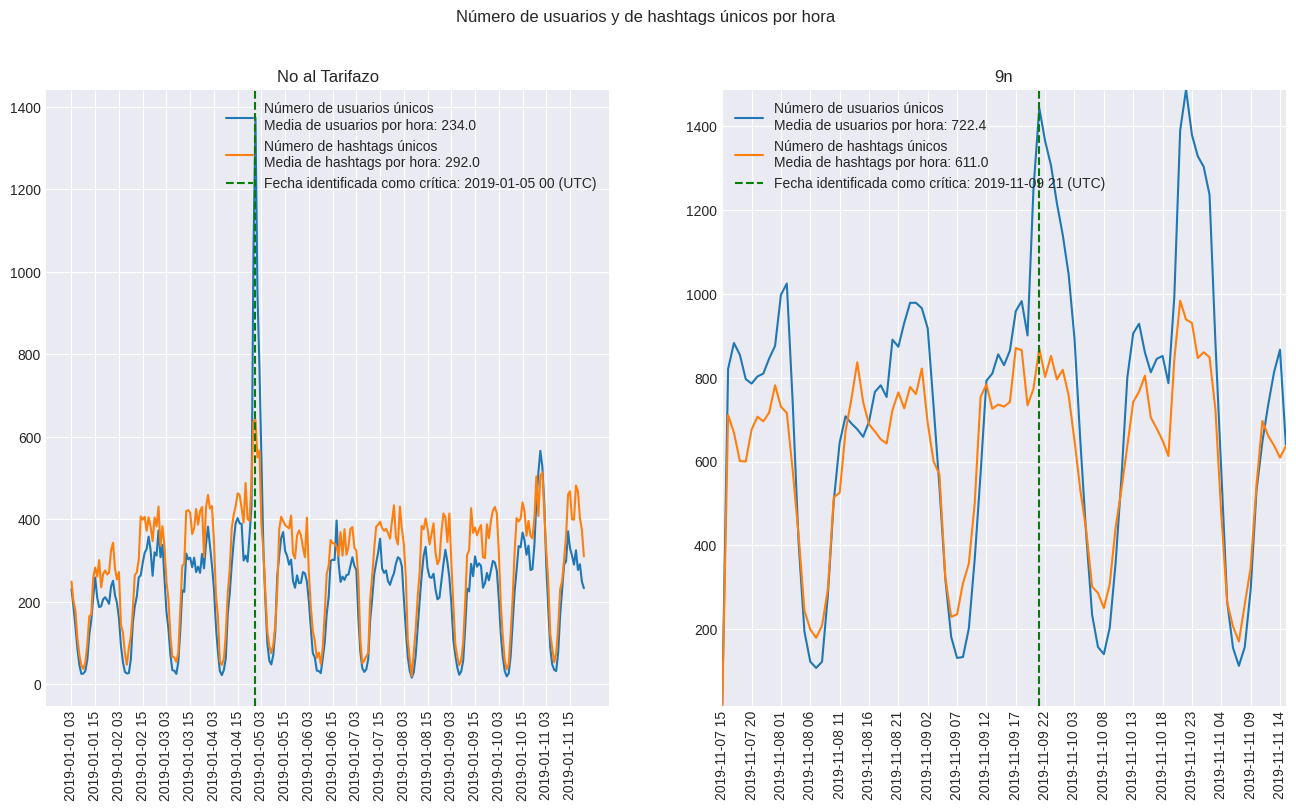

In [217]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,8)
fig.suptitle('Número de usuarios y de hashtags únicos por hora')
axs[0].set_title("No al Tarifazo")
axs[0].plot(hour_nat_dt, num_user_nat, label="Número de usuarios únicos\nMedia de usuarios por hora: " +str(round(np.mean(num_user_nat), 1)))
axs[0].plot(hour_nat_dt, num_hashtag_nat, label="Número de hashtags únicos\nMedia de hashtags por hora: " +str(round(np.mean(num_hashtag_nat), 1)))
axs[0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")) +' (UTC)')
axs[0].set_xticks(hour_nat_dt[::12])
axs[0].set_xticklabels(hour_nat_dt[::12])
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend()
axs[1].set_title("9n")
axs[1].plot(hour_9n_dt, num_user_9n, label="Número de usuarios únicos\nMedia de usuarios por hora: " +str(round(np.mean(num_user_9n), 1)))
axs[1].plot(hour_9n_dt, num_hashtag_9n, label="Número de hashtags únicos\nMedia de hashtags por hora: " +str(round(np.mean(num_hashtag_9n), 1)))
axs[1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")) +' (UTC)')
axs[1].set_xticks(hour_9n_dt[::5])
axs[1].set_xticklabels(hour_9n_dt[::5])
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend()
plt.autoscale(tight=True)
# TODO no se guarda bien, mucho borde y ejes mal
plt.savefig("plots/num_user_hashtag_manifestacion.png")
plt.show()


# Número  de nodos y aristas por hora

In [218]:
num_edges_nat = []
num_nodes_nat = []
for hour in hour_nat:
    G = nx.read_gexf("graphs/nodes_hashtag/nat/" + str(hour) + '.gexf')
    num_edges_nat.append(G.number_of_edges())
    num_nodes_nat.append(G.number_of_nodes())

num_edges_9n = []
num_nodes_9n = []
for hour in hour_9n:
    G = nx.read_gexf("graphs/nodes_hashtag/9n/" + str(hour) + '.gexf')
    num_edges_9n.append(G.number_of_edges())
    num_nodes_9n.append(G.number_of_nodes())

KeyboardInterrupt: 

Text(0.5, 1.05, 'Número de nodos y aristas por hora')

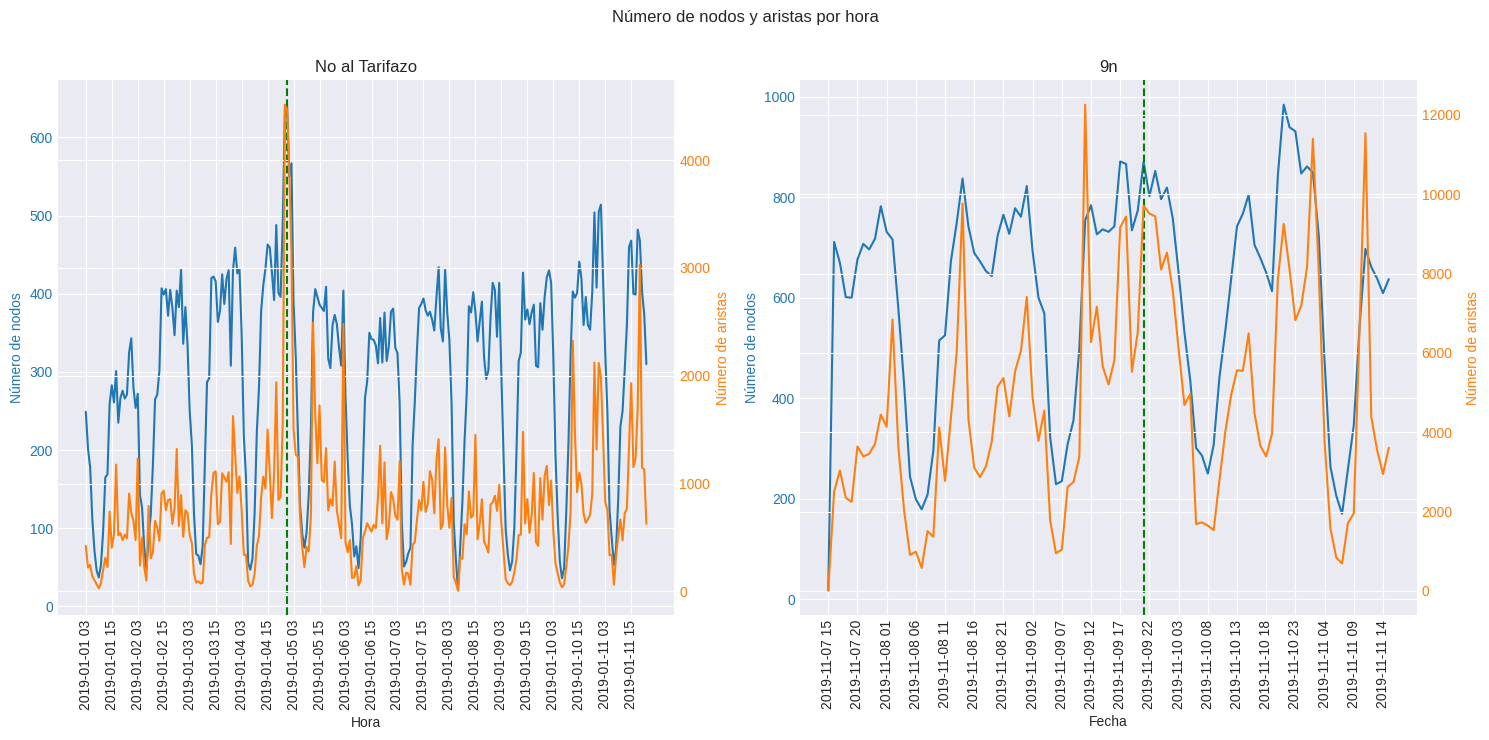

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1
ax1.plot(hour_nat_dt, num_nodes_nat, '#1f77b4', label="Número de nodos\nMedia de nodos por hora: " +str(round(np.mean(num_nodes_nat), 1)))
ax1.set_xlabel('Hora')
ax1.set_ylabel('Número de nodos', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")))

ax1b = ax1.twinx()
ax1b.plot(hour_nat_dt, num_edges_nat, '#ff7f0e', label="Número de aristas \nMedia de aristas por hora: " +str(round(np.mean(num_edges_nat), 1)))
ax1b.set_ylabel('Número de aristas', color='#ff7f0e')
ax1b.tick_params(axis='y', labelcolor='#ff7f0e')
#ax1b.legend()
ax1.set_title('No al Tarifazo')
ax1.set_xticks(hour_nat_dt[::12])
ax1.set_xticklabels(hour_nat_dt[::12])
ax1.tick_params(axis='x', rotation=90)

# Subplot 2
ax2.plot(hour_9n_dt, num_nodes_9n, '#1f77b4', label="Número de nodos\nMedia de nodos por hora: " +str(round(np.mean(num_nodes_9n), 1)))
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Número de nodos', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')
ax2.axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")))

ax2b = ax2.twinx()
ax2b.plot(hour_9n_dt, num_edges_9n, '#ff7f0e', label="Número de aristas\nMedia de aristas por hora: " +str(round(np.mean(num_edges_9n), 1)))
ax2b.set_ylabel('Número de aristas', color='#ff7f0e')
ax2b.tick_params(axis='y', labelcolor='#ff7f0e')
#ax2b.legend()
ax2.set_title('9n')

ax2.set_xticks(hour_9n_dt[::5])
ax2.set_xticklabels(hour_9n_dt[::5])
ax2.tick_params(axis='x', rotation=90)

# Opcional: Ajustar leyendas
fig.tight_layout()
fig.suptitle('Número de nodos y aristas por hora', y=1.05)

# Coeficiente de anidamiento horas criticas

In [ ]:
from nestedness_calculator import NestednessCalculator

def calc_nestedness(G):
    mat = nx.to_numpy_array(G, weight=None)
    mat = mat[~np.all(mat == 0, axis=1)]
    mat = mat[:,~np.all(mat == 0, axis=0)]
    nodf_score = NestednessCalculator(mat).nodf(mat)
    return nodf_score

In [ ]:
G = nx.read_gexf("graphs/nodes_hashtag/9n/437037.gexf")
print("Anidamiento 9n:", calc_nestedness(G))

F = nx.read_gexf("graphs/nodes_hashtag/nat/429624.gexf")
print("Anidamiento nat:", calc_nestedness(F))

Anidamiento 9n: 0.17242177776636688
Anidamiento nat: 0.2978050032185255


# Nestedness and modularity per mode of net

In [220]:
import os
import json
from utils_graph_metrics import convert_keys_to_float

## 9n

### Modo hashtag as nodes

In [221]:

dict_manif_9n_h = {}

# Intentamos cargar el archivo donde volcar los datos
if os.path.exists("measures/9n_h.json"):
    try:
        with open("measures/9n_h.json", 'r') as f:
            dict_manif_9n_h = json.load(f)
        dict_manif_9n_h = convert_keys_to_float(dict_manif_9n_h, recursive=False, tipo="int")
    except json.JSONDecodeError:
        dict_manif_9n_h = {}

arr_hour_9n_h =[]
arr_nest_9n_h = []
arr_mod_9n_h = []
for k in dict_manif_9n_h.keys():
    arr_hour_9n_h.append(str(k))
    arr_nest_9n_h.append(dict_manif_9n_h[k]["nestedness"])
    arr_mod_9n_h.append(dict_manif_9n_h[k]["modularity"])

data_9n_h = list(zip(arr_hour_9n_h, arr_mod_9n_h, arr_nest_9n_h))
data_9n_h.sort()
hour_sort_9n_h, mod_sort_9n_h, nest_sort_9n_h = zip(*data_9n_h)
hour_sort_9n_h = list(hour_sort_9n_h)
mod_sort_9n_h = list(mod_sort_9n_h)
nest_sort_9n_h = list(nest_sort_9n_h)

### Modo user as nodes

In [225]:

dict_manif_9n_u = {}

# Intentamos cargar el archivo donde volcar los datos
if os.path.exists("measures/9n_u.json"):
    try:
        with open("measures/9n_u.json", 'r') as f:
            dict_manif_9n_u = json.load(f)
        dict_manif_9n_u = convert_keys_to_float(dict_manif_9n_u, recursive=False, tipo="int")
    except json.JSONDecodeError:
        dict_manif_9n_u = {}

arr_hour_9n_u =[]
arr_nest_9n_u = []
arr_mod_9n_u = []
for k in dict_manif_9n_u.keys():
    arr_hour_9n_u.append(str(k))
    arr_nest_9n_u.append(dict_manif_9n_u[k]["nestedness"])
    arr_mod_9n_u.append(dict_manif_9n_u[k]["modularity"])

data_9n_u = list(zip(arr_hour_9n_u, arr_mod_9n_u, arr_nest_9n_u))
data_9n_u.sort()
hour_sort_9n_u, mod_sort_9n_u, nest_sort_9n_u = zip(*data_9n_u)
hour_sort_9n_u = list(hour_sort_9n_u)
mod_sort_9n_u = list(mod_sort_9n_u)
nest_sort_9n_u = list(nest_sort_9n_u)

### Modo bipartito

In [226]:

dict_manif_9n_b = {}

# Intentamos cargar el archivo donde volcar los datos
if os.path.exists("measures/9n_b.json"):
    try:
        with open("measures/9n_b.json", 'r') as f:
            dict_manif_9n_b = json.load(f)
        dict_manif_9n_b = convert_keys_to_float(dict_manif_9n_b, recursive=False, tipo="int")
    except json.JSONDecodeError:
        dict_manif_9n_b = {}

arr_hour_9n_b =[]
arr_nest_9n_b = []
arr_mod_9n_b = []
for k in dict_manif_9n_b.keys():
    arr_hour_9n_b.append(str(k))
    arr_nest_9n_b.append(dict_manif_9n_b[k]["nestedness"])
    arr_mod_9n_b.append(dict_manif_9n_b[k]["modularity"])

data_9n_b = list(zip(arr_hour_9n_b, arr_mod_9n_b, arr_nest_9n_b))
data_9n_b.sort()
hour_sort_9n_b, mod_sort_9n_b, nest_sort_9n_b = zip(*data_9n_b)
hour_sort_9n_b = list(hour_sort_9n_b)
mod_sort_9n_b = list(mod_sort_9n_b)
nest_sort_9n_b = list(nest_sort_9n_b)

## NAT

### Modo hashtag as nodes

In [227]:

dict_manif_nat_h = {}

# Intentamos cargar el archivo donde volcar los datos
if os.path.exists("measures/nat_h.json"):
    try:
        with open("measures/nat_h.json", 'r') as f:
            dict_manif_nat_h = json.load(f)
        dict_manif_nat_h = convert_keys_to_float(dict_manif_nat_h, recursive=False, tipo="int")
    except json.JSONDecodeError:
        dict_manif_nat_h = {}

arr_hour_nat_h =[]
arr_nest_nat_h = []
arr_mod_nat_h = []
for k in dict_manif_nat_h.keys():
    arr_hour_nat_h.append(str(k))
    arr_nest_nat_h.append(dict_manif_nat_h[k]["nestedness"])
    arr_mod_nat_h.append(dict_manif_nat_h[k]["modularity"])

data_nat_h = list(zip(arr_hour_nat_h, arr_mod_nat_h, arr_nest_nat_h))
data_nat_h.sort()
hour_sort_nat_h, mod_sort_nat_h, nest_sort_nat_h = zip(*data_nat_h)
hour_sort_nat_h = list(hour_sort_nat_h)
mod_sort_nat_h = list(mod_sort_nat_h)
nest_sort_nat_h = list(nest_sort_nat_h)

### Modo user as nodes

In [228]:

dict_manif_nat_u = {}

# Intentamos cargar el archivo donde volcar los datos
if os.path.exists("measures/nat_u.json"):
    try:
        with open("measures/nat_u.json", 'r') as f:
            dict_manif_nat_u = json.load(f)
        dict_manif_nat_u = convert_keys_to_float(dict_manif_nat_u, recursive=False, tipo="int")
    except json.JSONDecodeError:
        dict_manif_nat_u = {}

arr_hour_nat_u =[]
arr_nest_nat_u = []
arr_mod_nat_u = []
for k in dict_manif_nat_u.keys():
    arr_hour_nat_u.append(str(k))
    arr_nest_nat_u.append(dict_manif_nat_u[k]["nestedness"])
    arr_mod_nat_u.append(dict_manif_nat_u[k]["modularity"])

data_nat_u = list(zip(arr_hour_nat_u, arr_mod_nat_u, arr_nest_nat_u))
data_nat_u.sort()
hour_sort_nat_u, mod_sort_nat_u, nest_sort_nat_u = zip(*data_nat_u)
hour_sort_nat_u = list(hour_sort_nat_u)
mod_sort_nat_u = list(mod_sort_nat_u)
nest_sort_nat_u = list(nest_sort_nat_u)

### Modo bipartito

In [229]:

dict_manif_nat_b = {}

# Intentamos cargar el archivo donde volcar los datos
if os.path.exists("measures/nat_b.json"):
    try:
        with open("measures/nat_b.json", 'r') as f:
            dict_manif_nat_b = json.load(f)
        dict_manif_nat_b = convert_keys_to_float(dict_manif_nat_b, recursive=False, tipo="int")
    except json.JSONDecodeError:
        dict_manif_nat_b = {}

arr_hour_nat_b =[]
arr_nest_nat_b = []
arr_mod_nat_b = []
for k in dict_manif_nat_b.keys():
    arr_hour_nat_b.append(str(k))
    arr_nest_nat_b.append(dict_manif_nat_b[k]["nestedness"])
    arr_mod_nat_b.append(dict_manif_nat_b[k]["modularity"])

data_nat_b = list(zip(arr_hour_nat_b, arr_mod_nat_b, arr_nest_nat_b))
data_nat_b.sort()
hour_sort_nat_b, mod_sort_nat_b, nest_sort_nat_b = zip(*data_nat_b)
hour_sort_nat_b = list(hour_sort_nat_b)
mod_sort_nat_b = list(mod_sort_nat_b)
nest_sort_nat_b = list(nest_sort_nat_b)

## Ploteamos

In [251]:
dt_sort_arr_nat=[]
for hour in hour_sort_nat_b:
    dt_sort_arr_nat.append(datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"))

dt_sort_arr_9n=[]
for hour in hour_sort_9n_b:
    dt_sort_arr_9n.append(datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"))

Text(0.5, 1.05, 'Coeficientes de modularidad y de anidamiento para diferentes formaciones de las redes de conectividad')

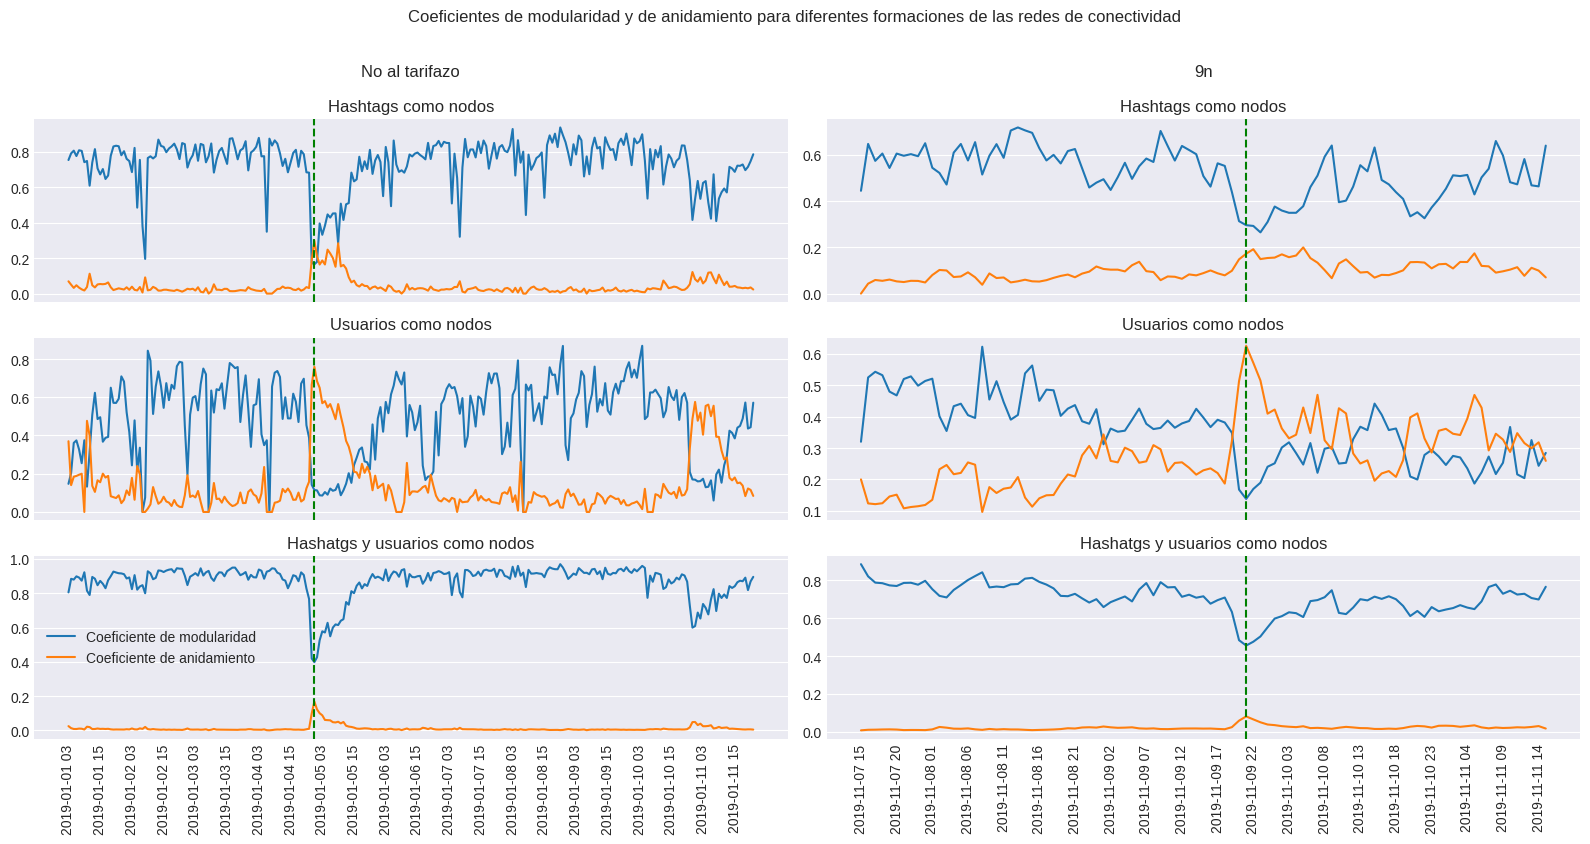

In [270]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16,8)

# LAdo izquierdo: NAT
axs[0, 0].plot(dt_sort_arr_nat, mod_sort_nat_h)
axs[0, 0].plot(dt_sort_arr_nat, nest_sort_nat_h)
axs[0, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[0, 0].get_xaxis().set_visible(False)
axs[0, 0].set_title("No al tarifazo\n\nHashtags como nodos")

axs[1, 0].plot(dt_sort_arr_nat, mod_sort_nat_u)
axs[1, 0].plot(dt_sort_arr_nat, nest_sort_nat_u)
axs[1, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[1, 0].get_xaxis().set_visible(False)
axs[1, 0].set_title("Usuarios como nodos")

axs[2, 0].plot(dt_sort_arr_nat, mod_sort_nat_b, label = "Coeficiente de modularidad")
axs[2, 0].plot(dt_sort_arr_nat, nest_sort_nat_b, label = "Coeficiente de anidamiento")
axs[2, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[2, 0].set_xticks(dt_sort_arr_nat[::12])
axs[2, 0].set_xticklabels(dt_sort_arr_nat[::12])
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].grid(axis='x', linestyle='')
axs[2, 0].legend()
axs[2, 0].set_title("Hashatgs y usuarios como nodos")

axs[0, 1].plot(dt_sort_arr_9n, mod_sort_9n_h)
axs[0, 1].plot(dt_sort_arr_9n, nest_sort_9n_h)
axs[0, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[0, 1].get_xaxis().set_visible(False)
axs[0, 1].set_title("9n\n\nHashtags como nodos")

axs[1, 1].plot(dt_sort_arr_9n, mod_sort_9n_u)
axs[1, 1].plot(dt_sort_arr_9n, nest_sort_9n_u)
axs[1, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[1, 1].get_xaxis().set_visible(False)
axs[1, 1].set_title("Usuarios como nodos")

axs[2, 1].plot(dt_sort_arr_9n, mod_sort_9n_b)
axs[2, 1].plot(dt_sort_arr_9n, nest_sort_9n_b)
axs[2, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[2, 1].set_xticks(dt_sort_arr_9n[::5])
axs[2, 1].set_xticklabels(dt_sort_arr_9n[::5])
axs[2, 1].grid(axis='x', linestyle='')
axs[2, 1].tick_params(axis='x', rotation=90)
axs[2, 1].set_title("Hashatgs y usuarios como nodos")


fig.tight_layout()
fig.suptitle('Coeficientes de modularidad y de anidamiento para diferentes formaciones de las redes de conectividad', y=1.05)



# Histograma, PDF, CDF y CCDF